# Machine Learning Engineer Nanodegree
## Reinforcement Learning
## Project: Train a Smartcab to Drive

Welcome to the fourth project of the Machine Learning Engineer Nanodegree! In this notebook, template code has already been provided for you to aid in your analysis of the *Smartcab* and your implemented learning algorithm. You will not need to modify the included code beyond what is requested. There will be questions that you must answer which relate to the project and the visualizations provided in the notebook. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide in `agent.py`.  

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

-----

## Getting Started
In this project, you will work towards constructing an optimized Q-Learning driving agent that will navigate a *Smartcab* through its environment towards a goal. Since the *Smartcab* is expected to drive passengers from one location to another, the driving agent will be evaluated on two very important metrics: **Safety** and **Reliability**. A driving agent that gets the *Smartcab* to its destination while running red lights or narrowly avoiding accidents would be considered **unsafe**. Similarly, a driving agent that frequently fails to reach the destination in time would be considered **unreliable**. Maximizing the driving agent's **safety** and **reliability** would ensure that *Smartcabs* have a permanent place in the transportation industry.

**Safety** and **Reliability** are measured using a letter-grade system as follows:

| Grade 	| Safety 	| Reliability 	|
|:-----:	|:------:	|:-----------:	|
|   A+  	|  Agent commits no traffic violations,<br/>and always chooses the correct action. | Agent reaches the destination in time<br />for 100% of trips. |
|   A   	|  Agent commits few minor traffic violations,<br/>such as failing to move on a green light. | Agent reaches the destination on time<br />for at least 90% of trips. |
|   B   	| Agent commits frequent minor traffic violations,<br/>such as failing to move on a green light. | Agent reaches the destination on time<br />for at least 80% of trips. |
|   C   	|  Agent commits at least one major traffic violation,<br/> such as driving through a red light. | Agent reaches the destination on time<br />for at least 70% of trips. |
|   D   	| Agent causes at least one minor accident,<br/> such as turning left on green with oncoming traffic.       	| Agent reaches the destination on time<br />for at least 60% of trips. |
|   F   	|  Agent causes at least one major accident,<br />such as driving through a red light with cross-traffic.      	| Agent fails to reach the destination on time<br />for at least 60% of trips. |

To assist evaluating these important metrics, you will need to load visualization code that will be used later on in the project. Run the code cell below to import this code which is required for your analysis.

In [2]:
# Import the visualization code
import visuals as vs

# Pretty display for notebooks
%matplotlib inline

### Understand the World
Before starting to work on implementing your driving agent, it's necessary to first understand the world (environment) which the *Smartcab* and driving agent work in. One of the major components to building a self-learning agent is understanding the characteristics about the agent, which includes how the agent operates. To begin, simply run the `agent.py` agent code exactly how it is -- no need to make any additions whatsoever. Let the resulting simulation run for some time to see the various working components. Note that in the visual simulation (if enabled), the **white vehicle** is the *Smartcab*.

### Question 1
In a few sentences, describe what you observe during the simulation when running the default `agent.py` agent code. Some things you could consider:
- *Does the Smartcab move at all during the simulation?*
- *What kind of rewards is the driving agent receiving?*
- *How does the light changing color affect the rewards?*  

**Hint:** From the `/smartcab/` top-level directory (where this notebook is located), run the command 
```bash
'python smartcab/agent.py'
```

### Answer 1

* The Smartcab never takes an actions regardless of state (it doesn't move)
* The Smartcab receives a positive reward for taking no action at a redlight and a negative reward for taking no action at a green light. 
* The magnitude of the reward also changes from state to state, even while the light is holding red or green
* The negative reward for taking no action at a green light is larger than the positive reward for taking no action at a red light

### Understand the Code
In addition to understanding the world, it is also necessary to understand the code itself that governs how the world, simulation, and so on operate. Attempting to create a driving agent would be difficult without having at least explored the *"hidden"* devices that make everything work. In the `/smartcab/` top-level directory, there are two folders: `/logs/` (which will be used later) and `/smartcab/`. Open the `/smartcab/` folder and explore each Python file included, then answer the following question.

### Question 2
- *In the *`agent.py`* Python file, choose three flags that can be set and explain how they change the simulation.*
    * Learning: Whether or not the agent will implement Q-Learning to learn and choose actions.
    * Epsilon: Random exploration factor. This controls the probability that the agent will choose an action using it's policy or choose a random one.
    * Alpha: Learning factor. This controls the learning bias towards Q values learned in the past compared to the Q value from the latest time step.


- *In the *`environment.py`* Python file, what Environment class function is called when an agent performs an action?*
    * act()


- *In the *`simulator.py`* Python file, what is the difference between the *`'render_text()'`* function and the *`'render()'`* function?*
    * render.text(): Renders text data in the terminal/command prompt.
    * render(): Rengers the GUI display of the simulation


- *In the *`planner.py`* Python file, will the *`'next_waypoint()`* function consider the North-South or East-West direction first?*
    * next_waypoint() considers the East-West direction first    

-----
## Implement a Basic Driving Agent

The first step to creating an optimized Q-Learning driving agent is getting the agent to actually take valid actions. In this case, a valid action is one of `None`, (do nothing) `'left'` (turn left), `right'` (turn right), or `'forward'` (go forward). For your first implementation, navigate to the `'choose_action()'` agent function and make the driving agent randomly choose one of these actions. Note that you have access to several class variables that will help you write this functionality, such as `'self.learning'` and `'self.valid_actions'`. Once implemented, run the agent file and simulation briefly to confirm that your driving agent is taking a random action each time step.

### Basic Agent Simulation Results
To obtain results from the initial simulation, you will need to adjust following flags:
- `'enforce_deadline'` - Set this to `True` to force the driving agent to capture whether it reaches the destination in time.
- `'update_delay'` - Set this to a small value (such as `0.01`) to reduce the time between steps in each trial.
- `'log_metrics'` - Set this to `True` to log the simluation results as a `.csv` file in `/logs/`.
- `'n_test'` - Set this to `'10'` to perform 10 testing trials.

Optionally, you may disable to the visual simulation (which can make the trials go faster) by setting the `'display'` flag to `False`. Flags that have been set here should be returned to their default setting when debugging. It is important that you understand what each flag does and how it affects the simulation!

Once you have successfully completed the initial simulation (there should have been 20 training trials and 10 testing trials), run the code cell below to visualize the results. Note that log files are overwritten when identical simulations are run, so be careful with what log file is being loaded!
Run the agent.py file after setting the flags from projects/smartcab folder instead of projects/smartcab/smartcab.


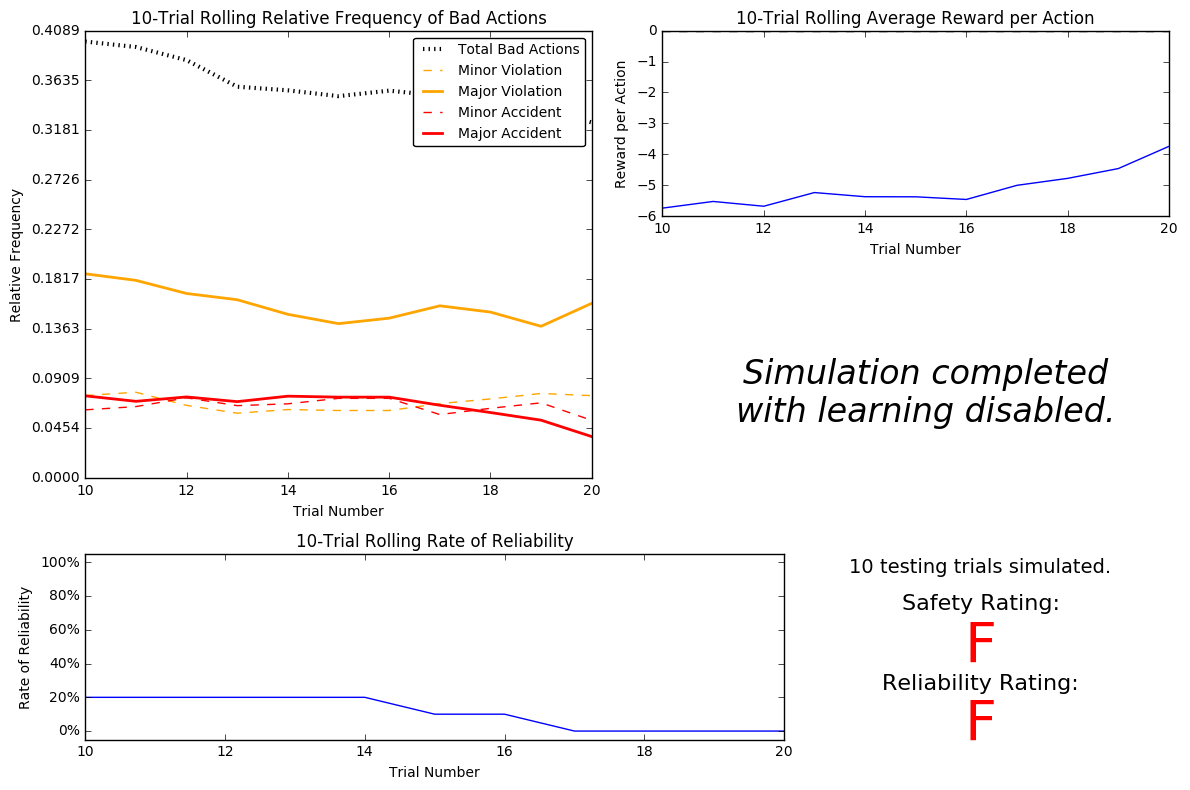

In [5]:
# Load the 'sim_no-learning' log file from the initial simulation results
vs.plot_trials('sim_no-learning.csv')

### Question 3
Using the visualization above that was produced from your initial simulation, provide an analysis and make several observations about the driving agent. Be sure that you are making at least one observation about each panel present in the visualization. Some things you could consider:

- *How frequently is the driving agent making bad decisions? How many of those bad decisions cause accidents?*

    The agent is making bad decisions about 0.4 percent of the time. About 1 out of every 5 of those bad decisions causes an accident.  
    
    
- *Given that the agent is driving randomly, does the rate of reliabilty make sense?*

    Yes. It's seems very unlikely that the smartcab would end up at the desired destination when choosing actions randomly.
   
   
- *What kind of rewards is the agent receiving for its actions? Do the rewards suggest it has been penalized heavily?*

    The average reward per action is about -5. I think the smartcab needs a better driving instructor...


- *As the number of trials increases, does the outcome of results change significantly?*

    The results aren't changing much which makes sense since we haven't implemented any learning yet.
    
    
- *Would this Smartcab be considered safe and/or reliable for its passengers? Why or why not?*

    No. There's often one or more actions in a given state which are very unsafe. Picking actions randomly seems like a bad plan for avoiding those bad decisions.

-----
## Inform the Driving Agent
The second step to creating an optimized Q-learning driving agent is defining a set of states that the agent can occupy in the environment. Depending on the input, sensory data, and additional variables available to the driving agent, a set of states can be defined for the agent so that it can eventually *learn* what action it should take when occupying a state. The condition of `'if state then action'` for each state is called a **policy**, and is ultimately what the driving agent is expected to learn. Without defining states, the driving agent would never understand which action is most optimal -- or even what environmental variables and conditions it cares about!

### Identify States
Inspecting the `'build_state()'` agent function shows that the driving agent is given the following data from the environment:
- `'waypoint'`, which is the direction the *Smartcab* should drive leading to the destination, relative to the *Smartcab*'s heading.
- `'inputs'`, which is the sensor data from the *Smartcab*. It includes 
  - `'light'`, the color of the light.
  - `'left'`, the intended direction of travel for a vehicle to the *Smartcab*'s left. Returns `None` if no vehicle is present.
  - `'right'`, the intended direction of travel for a vehicle to the *Smartcab*'s right. Returns `None` if no vehicle is present.
  - `'oncoming'`, the intended direction of travel for a vehicle across the intersection from the *Smartcab*. Returns `None` if no vehicle is present.
- `'deadline'`, which is the number of actions remaining for the *Smartcab* to reach the destination before running out of time.

### Question 4
*Which features available to the agent are most relevant for learning both **safety** and **efficiency**? Why are these features appropriate for modeling the *Smartcab* in the environment? If you did not choose some features, why are those features* not *appropriate? Please note that whatever features you eventually choose for your agent's state, must be argued for here. That is: your code in agent.py should reflect the features chosen in this answer.
*

NOTE: You are not allowed to engineer new features for the smartcab. 

**Features which are relevant**

* Waypoint:
    * Relevant for learning efficiency 
    * Without knowing where it's supposed to be going, the agent won't be able to learn to choose actions which move it towards the desired destination. 


* Light:
    * Relevant for learning safety
    * The traffic light state is important for determining what actions the smartcab is allowed to take as well as what actions the other drivers are going to take (do the other drivers always obey the rules?). For example, going forward on a red light is a violation on it's own, but it can also lead to an accident if another car is going through the intersection at the same time.


* Left:
    * Relevant for learning safety
    * If the light is red, and the smart cab wants to go "right", it needs to check if any cars on the left are going "forward" or not. If there is a car going "forward", the smart cab needs to give it right-of-way by performing no action. Otherwise, the smartcab will get into an accident.


* Oncoming:
    * Relevant for learning safety
    * If the light is green, and the smartcab plans to go "left", it needs to check whether any oncoming cars are going "forward" through the intersection. If there is a car going "forward", the smart cab needs to give it right-of-way by performing no action or by going forward through the intersection. Otherwise, the smartcab will get into an accident.
    
**Features which are not relevant**

* Right:
    * If the smartcab learns that the only action it can take on a red light is "right" or "none" then the action that the car on the right will be taking will never impede the safety or efficiency of the smartcab (there's no case where the car on the right will get into an accident with us)
    

* Deadline:
    * You could learn to sacrifice safety for efficiency as the smartcab approaches the deadline but this is a trade-off that my smartcab company doesn't want to make.

### Define a State Space
When defining a set of states that the agent can occupy, it is necessary to consider the *size* of the state space. That is to say, if you expect the driving agent to learn a **policy** for each state, you would need to have an optimal action for *every* state the agent can occupy. If the number of all possible states is very large, it might be the case that the driving agent never learns what to do in some states, which can lead to uninformed decisions. For example, consider a case where the following features are used to define the state of the *Smartcab*:

`('is_raining', 'is_foggy', 'is_red_light', 'turn_left', 'no_traffic', 'previous_turn_left', 'time_of_day')`.

How frequently would the agent occupy a state like `(False, True, True, True, False, False, '3AM')`? Without a near-infinite amount of time for training, it's doubtful the agent would ever learn the proper action!

### Question 5
*If a state is defined using the features you've selected from **Question 4**, what would be the size of the state space? Given what you know about the environment and how it is simulated, do you think the driving agent could learn a policy for each possible state within a reasonable number of training trials?*  
**Hint:** Consider the *combinations* of features to calculate the total number of states!

**Feature states:**

Waypoint(left, right, forward) = 3  
inputs.light(red,green) = 2  
inputs.left(none,left,right,forward) = 4  
inputs.oncoming(none,left,right,forward) = 4  
  
Total states = 3x2x4x4 = 96

It only took me a few minutes to run 300 trials below, and it looks like it's converged to a policy which is close to optimal. So in this case, because the state space is so small, it's reasonable to explore the entire state space long enough to find good actions for each one.

### Update the Driving Agent State
For your second implementation, navigate to the `'build_state()'` agent function. With the justification you've provided in **Question 4**, you will now set the `'state'` variable to a tuple of all the features necessary for Q-Learning. Confirm your driving agent is updating its state by running the agent file and simulation briefly and note whether the state is displaying. If the visual simulation is used, confirm that the updated state corresponds with what is seen in the simulation.

**Note:** Remember to reset simulation flags to their default setting when making this observation!

-----
## Implement a Q-Learning Driving Agent
The third step to creating an optimized Q-Learning agent is to begin implementing the functionality of Q-Learning itself. The concept of Q-Learning is fairly straightforward: For every state the agent visits, create an entry in the Q-table for all state-action pairs available. Then, when the agent encounters a state and performs an action, update the Q-value associated with that state-action pair based on the reward received and the iterative update rule implemented. Of course, additional benefits come from Q-Learning, such that we can have the agent choose the *best* action for each state based on the Q-values of each state-action pair possible. For this project, you will be implementing a *decaying,* $\epsilon$*-greedy* Q-learning algorithm with *no* discount factor. Follow the implementation instructions under each **TODO** in the agent functions.

Note that the agent attribute `self.Q` is a dictionary: This is how the Q-table will be formed. Each state will be a key of the `self.Q` dictionary, and each value will then be another dictionary that holds the *action* and *Q-value*. Here is an example:

```
{ 'state-1': { 
    'action-1' : Qvalue-1,
    'action-2' : Qvalue-2,
     ...
   },
  'state-2': {
    'action-1' : Qvalue-1,
     ...
   },
   ...
}
```

Furthermore, note that you are expected to use a *decaying* $\epsilon$ *(exploration) factor*. Hence, as the number of trials increases, $\epsilon$ should decrease towards 0. This is because the agent is expected to learn from its behavior and begin acting on its learned behavior. Additionally, The agent will be tested on what it has learned after $\epsilon$ has passed a certain threshold (the default threshold is 0.05). For the initial Q-Learning implementation, you will be implementing a linear decaying function for $\epsilon$.

### Q-Learning Simulation Results
To obtain results from the initial Q-Learning implementation, you will need to adjust the following flags and setup:
- `'enforce_deadline'` - Set this to `True` to force the driving agent to capture whether it reaches the destination in time.
- `'update_delay'` - Set this to a small value (such as `0.01`) to reduce the time between steps in each trial.
- `'log_metrics'` - Set this to `True` to log the simluation results as a `.csv` file and the Q-table as a `.txt` file in `/logs/`.
- `'n_test'` - Set this to `'10'` to perform 10 testing trials.
- `'learning'` - Set this to `'True'` to tell the driving agent to use your Q-Learning implementation.

In addition, use the following decay function for $\epsilon$:

$$ \epsilon_{t+1} = \epsilon_{t} - 0.05, \hspace{10px}\textrm{for trial number } t$$

If you have difficulty getting your implementation to work, try setting the `'verbose'` flag to `True` to help debug. Flags that have been set here should be returned to their default setting when debugging. It is important that you understand what each flag does and how it affects the simulation! 

Once you have successfully completed the initial Q-Learning simulation, run the code cell below to visualize the results. Note that log files are overwritten when identical simulations are run, so be careful with what log file is being loaded!

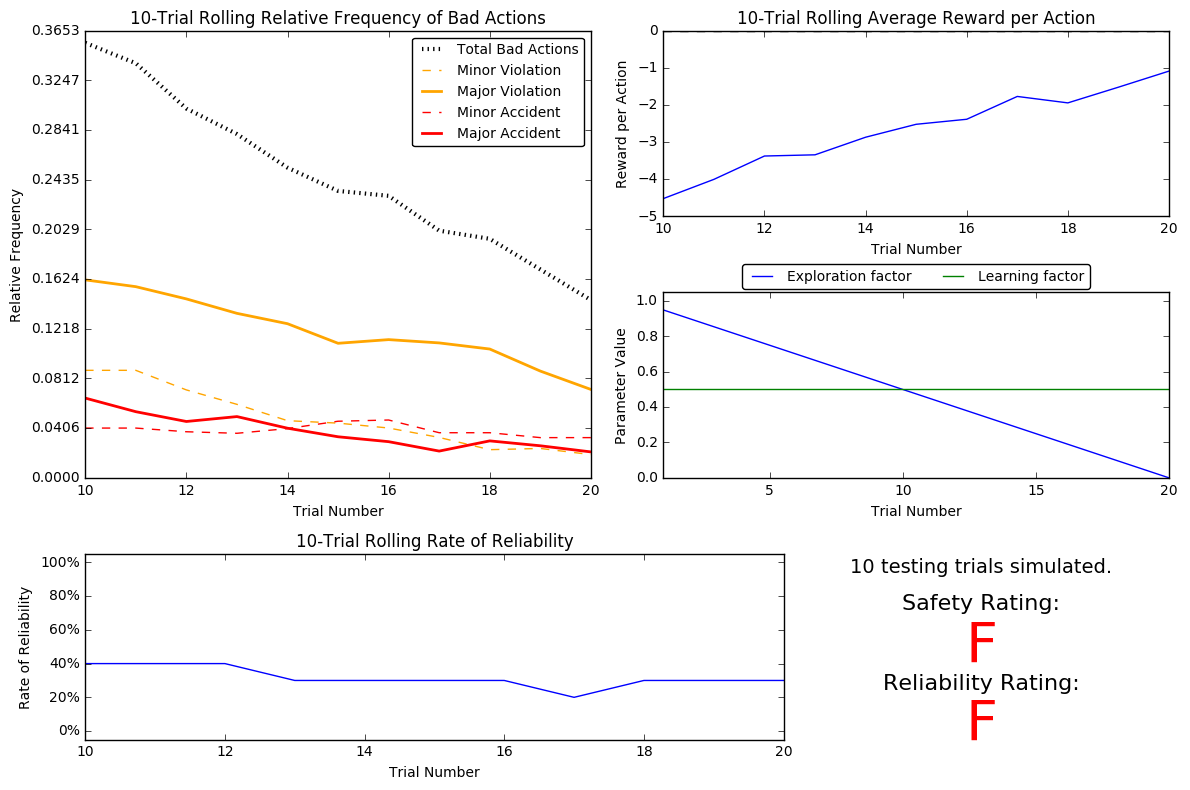

In [6]:
# Load the 'sim_default-learning' file from the default Q-Learning simulation
vs.plot_trials('sim_default-learning.csv')

### Question 6
Using the visualization above that was produced from your default Q-Learning simulation, provide an analysis and make observations about the driving agent like in **Question 3**. Note that the simulation should have also produced the Q-table in a text file which can help you make observations about the agent's learning. Some additional things you could consider:  

- *Are there any observations that are similar between the basic driving agent and the default Q-Learning agent?*

    - The frequency of bad actions start roughly the same for both agents  
    - The frequency of bad actions and rewards per action vary around the global trend (sloped downward for the Q-learning agent and constant for the basic agent) over trials for both agents  


- *Approximately how many training trials did the driving agent require before testing? Does that number make sense given the epsilon-tolerance?*

    - About 20 trials. I set the epsilon to decay 0.05 per trial so it makes sense that it would take about 20 trials until the epsilon reached the default epsilon-tolerance of 0.05 (1/0.05 = 20).


- *Is the decaying function you implemented for $\epsilon$ (the exploration factor) accurately represented in the parameters panel?*

    - Yes
    
    
- *As the number of training trials increased, did the number of bad actions decrease? Did the average reward increase?*

    - The frequency of bad actions is trending down and the reward per action is trending up. Looks good!
    
    
- *How does the safety and reliability rating compare to the initial driving agent?*

    - The safety and the reliability rating of the smartcab increased. The safety rating is still low though. The grading for safety is very strict, as it should be for a task like driving, in such a way that it strongly discourages any major violations. Perhaps we need to update our rewards so that it reinforces the importance of never taking actions which lead to major violations. Or maybe we just need to train the agent for longer before the testing.

-----
## Improve the Q-Learning Driving Agent
The third step to creating an optimized Q-Learning agent is to perform the optimization! Now that the Q-Learning algorithm is implemented and the driving agent is successfully learning, it's necessary to tune settings and adjust learning paramaters so the driving agent learns both **safety** and **efficiency**. Typically this step will require a lot of trial and error, as some settings will invariably make the learning worse. One thing to keep in mind is the act of learning itself and the time that this takes: In theory, we could allow the agent to learn for an incredibly long amount of time; however, another goal of Q-Learning is to *transition from experimenting with unlearned behavior to acting on learned behavior*. For example, always allowing the agent to perform a random action during training (if $\epsilon = 1$ and never decays) will certainly make it *learn*, but never let it *act*. When improving on your Q-Learning implementation, consider the implications it creates and whether it is logistically sensible to make a particular adjustment.

### Improved Q-Learning Simulation Results
To obtain results from the initial Q-Learning implementation, you will need to adjust the following flags and setup:
- `'enforce_deadline'` - Set this to `True` to force the driving agent to capture whether it reaches the destination in time.
- `'update_delay'` - Set this to a small value (such as `0.01`) to reduce the time between steps in each trial.
- `'log_metrics'` - Set this to `True` to log the simluation results as a `.csv` file and the Q-table as a `.txt` file in `/logs/`.
- `'learning'` - Set this to `'True'` to tell the driving agent to use your Q-Learning implementation.
- `'optimized'` - Set this to `'True'` to tell the driving agent you are performing an optimized version of the Q-Learning implementation.

Additional flags that can be adjusted as part of optimizing the Q-Learning agent:
- `'n_test'` - Set this to some positive number (previously 10) to perform that many testing trials.
- `'alpha'` - Set this to a real number between 0 - 1 to adjust the learning rate of the Q-Learning algorithm.
- `'epsilon'` - Set this to a real number between 0 - 1 to adjust the starting exploration factor of the Q-Learning algorithm.
- `'tolerance'` - set this to some small value larger than 0 (default was 0.05) to set the epsilon threshold for testing.

Furthermore, use a decaying function of your choice for $\epsilon$ (the exploration factor). Note that whichever function you use, it **must decay to **`'tolerance'`** at a reasonable rate**. The Q-Learning agent will not begin testing until this occurs. Some example decaying functions (for $t$, the number of trials):

$$ \epsilon = a^t, \textrm{for } 0 < a < 1 \hspace{50px}\epsilon = \frac{1}{t^2}\hspace{50px}\epsilon = e^{-at}, \textrm{for } 0 < a < 1 \hspace{50px} \epsilon = \cos(at), \textrm{for } 0 < a < 1$$
You may also use a decaying function for $\alpha$ (the learning rate) if you so choose, however this is typically less common. If you do so, be sure that it adheres to the inequality $0 \leq \alpha \leq 1$.

If you have difficulty getting your implementation to work, try setting the `'verbose'` flag to `True` to help debug. Flags that have been set here should be returned to their default setting when debugging. It is important that you understand what each flag does and how it affects the simulation! 

Once you have successfully completed the improved Q-Learning simulation, run the code cell below to visualize the results. Note that log files are overwritten when identical simulations are run, so be careful with what log file is being loaded!

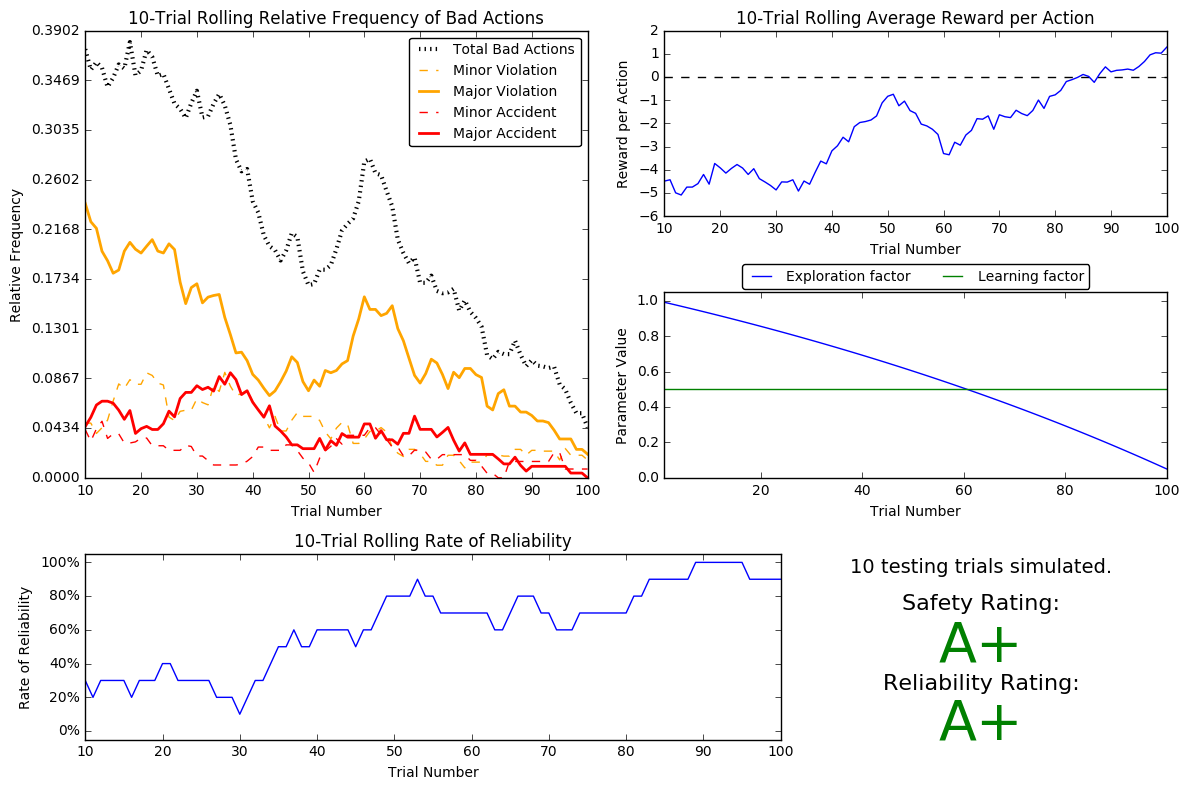

In [16]:
# Load the 'sim_improved-learning' file from the improved Q-Learning simulation
vs.plot_trials('sim_improved-learning.csv')

#Epsilon = 2-B^t

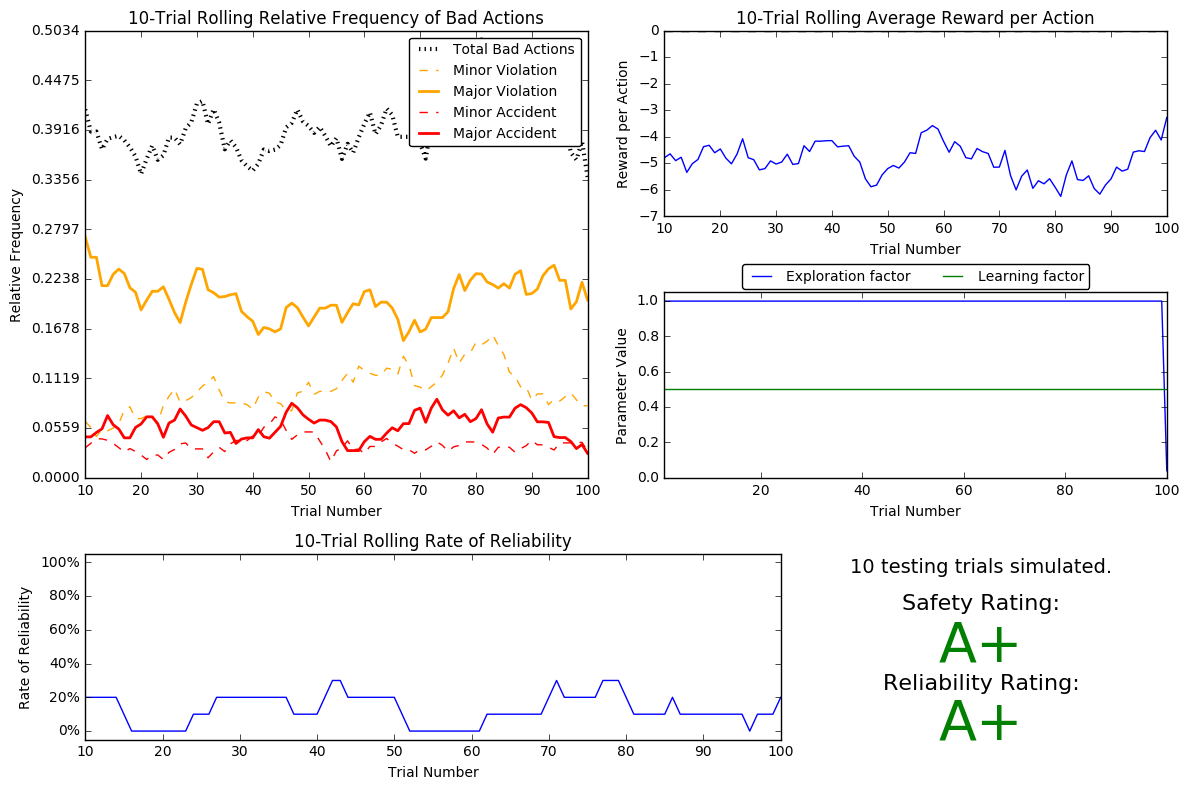

In [20]:
# Load the 'sim_improved-learning' file from the improved Q-Learning simulation
vs.plot_trials('sim_improved-learning.csv')

#Epsilon = 1

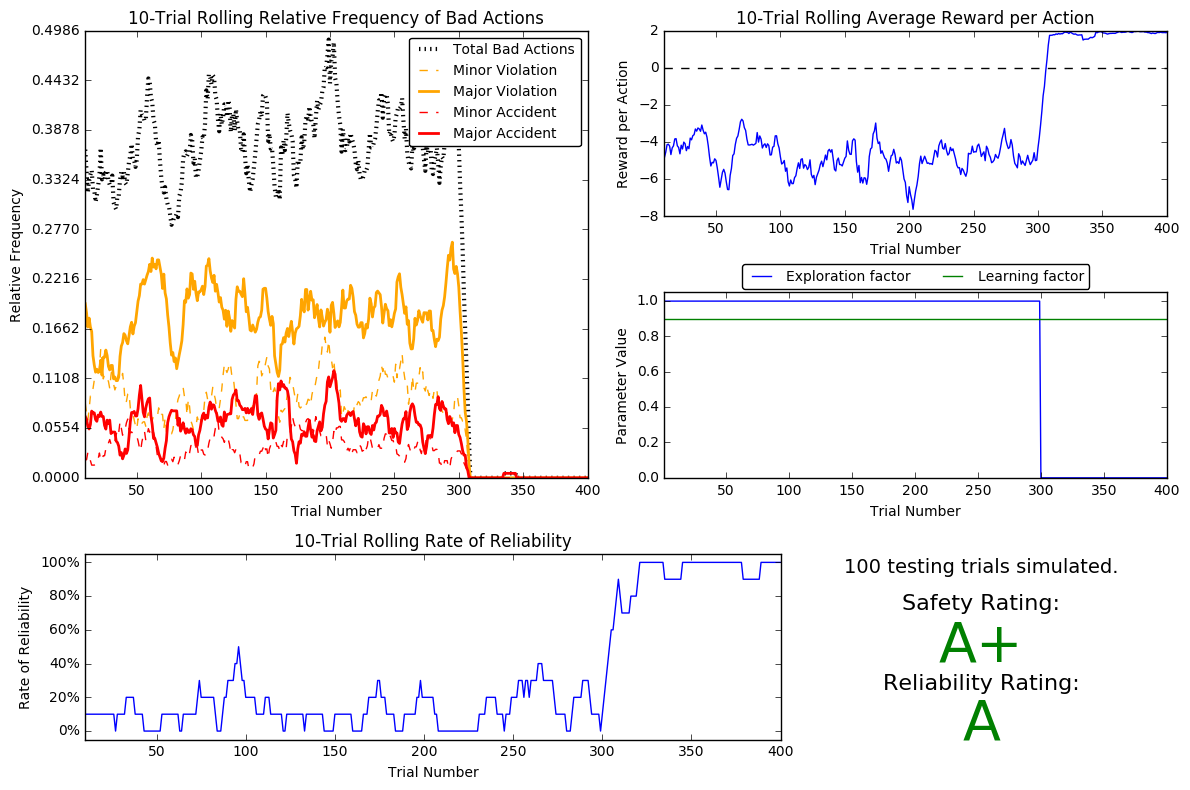

In [7]:
# Load the 'sim_improved-learning' file from the improved Q-Learning simulation
vs.plot_trials('sim_improved-learning.csv')

#Epsilon = 1
#Traing = 300
#Driving = 100
#Testing = 100

### Question 7
Using the visualization above that was produced from your improved Q-Learning simulation, provide a final analysis and make observations about the improved driving agent like in **Question 6**. Questions you should answer:  
- *What decaying function was used for epsilon (the exploration factor)?*
- *Approximately how many training trials were needed for your agent before begining testing?*
- *What epsilon-tolerance and alpha (learning rate) did you use? Why did you use them?*
- *How much improvement was made with this Q-Learner when compared to the default Q-Learner from the previous section?*
- *Would you say that the Q-Learner results show that your driving agent successfully learned an appropriate policy?*
- *Are you satisfied with the safety and reliability ratings of the *Smartcab*?*

**Answer:**

- *What decaying function was used for epsilon (the exploration factor)?*
- *Approximately how many training trials were needed for your agent before begining testing?*
      
I tried:
- epsilon = a^t
- epsilon = 2-a^t
- epsilon = 1
    
I set up each decay function such that 100 training trials were completed before testing. I switched from the first equation to the second so that the smartcab would spend more time exploring the state-action space. Then I realized I could simply keep epsilon at 1 and end training after a specific number of training trials to maximize time spent exploring the state-space. The downside of the approach is that the visualizations above don't tell you anything about how well the smartcab is learning because it never implements what it learned during training. That's why I did a fourth training, using a constant epsilon of 1 again, and 100 trials of "training" with epsilon set almost to zero. This way we can use the visualizations to see how the car is performing.
    

- *What epsilon-tolerance and alpha (learning rate) did you use? Why did you use them?*

I didn't find that manipulating the epsilon-tolerance and alpha had any useful effect on training. Moving the epsilon-tolerance up or down simply shortened or prolonged the training time (which can be done with the epsilon decay factor). It could also be used to end training earlier in the transition from exploration to exploitation, but again, this could be done while keeping the epsilon tolerance constant and choosing an appropriate decay function. The alpha rate also doesn't have an important effect. The only thing that matters for the algorithm is the relative difference between the Q values of the actions for a given state. If the agent encounters each state-action pair often enough, and the rewards are set up to reinforce the desired policy, then the correct action for a given state will be found regardless of the magnitude of the update to the Q value (in this case, the encountered reward) which is what the alpha rate controls. The correct maximum Q value across actions will be the same (given the assumption above that all state-action pairs are visited often enough).

- *How much improvement was made with this Q-Learner when compared to the default Q-Learner from the previous section?*

When I implemented the a^t and 2-a^t decay functions, with the same parameters as the default Q-Learner and a value for "a" such that the training finished at 100 trials (similar to the default Q-Learner test), the results were better, but I suspect this is only due to the fact that more training trials were performed, not due to the choice of decay function. These decay functions didn't substantially increase (if at all) the amount of the state-action space that the agent was able to explore (for the same training period). In the last test above, I set the agent to only take random actions, and to do so for 300 training trials (plus another 100 where it only implemented the policy so we can visually see how the agent is performing), and in this case there's a significant improvement from the default Q-Learner. From visual inspection of the bad actions graph, it seems likely that the agent has learned the optimal policy, since it didn't perform a bad action over 100 trials. The default Q-Learner, by the end of it's training trials, still has a bad actions frequency of about 0.05. 

- *Would you say that the Q-Learner results show that your driving agent successfully learned an appropriate policy?*

As I mentioned above. In the case where I allowed the agent to take random actions for 300 trials, I believe the driving agent has learned the optimal policy.

- *Are you satisfied with the safety and reliability ratings of the *Smartcab*?*

I am satisfied with it's safety. Although, I would still take a look at the learned Q-values to confirm that it's learned to take the optimal action for every possible state.

### Define an Optimal Policy

Sometimes, the answer to the important question *"what am I trying to get my agent to learn?"* only has a theoretical answer and cannot be concretely described. Here, however, you can concretely define what it is the agent is trying to learn, and that is the U.S. right-of-way traffic laws. Since these laws are known information, you can further define, for each state the *Smartcab* is occupying, the optimal action for the driving agent based on these laws. In that case, we call the set of optimal state-action pairs an **optimal policy**. Hence, unlike some theoretical answers, it is clear whether the agent is acting "incorrectly" not only by the reward (penalty) it receives, but also by pure observation. If the agent drives through a red light, we both see it receive a negative reward but also know that it is not the correct behavior. This can be used to your advantage for verifying whether the **policy** your driving agent has learned is the correct one, or if it is a **suboptimal policy**.

### Question 8

1. Please summarize what the optimal policy is for the smartcab in the given environment. What would be the best set of instructions possible given what we know about the environment? 
   _You can explain with words or a table, but you should thoroughly discuss the optimal policy._

2. Next, investigate the `'sim_improved-learning.txt'` text file to see the results of your improved Q-Learning algorithm. _For each state that has been recorded from the simulation, is the **policy** (the action with the highest value) correct for the given state? Are there any states where the policy is different than what would be expected from an optimal policy?_ 

3. Provide a few examples from your recorded Q-table which demonstrate that your smartcab learned the optimal policy. Explain why these entries demonstrate the optimal policy.

4. Try to find at least one entry where the smartcab did _not_ learn the optimal policy.  Discuss why your cab may have not learned the correct policy for the given state.

Be sure to document your `state` dictionary below, it should be easy for the reader to understand what each state represents.

**Answer:** 

**Example 1**

Waypoint = 'Left'  
Light = 'Green'  
Car on left = 'None'  
Car oncoming = 'Forward'  

We would like to go left, and the light is green, so far so good. No cars on the left but they wouldn't get in our way anyways. The oncoming car is going forward though, so we can't turn left. Doing nothing at a light gets us a penalty, going right takes us in the opposite way that we want to go, so the optimal policy would be to go forward.

**Example 2**

Waypoint = 'right'  
Light = 'red'  
Car on left = 'left'  
Car oncoming = 'left'  

We would like to go right, and we can do that on any light color. The car on the left is going left which won't get in the way of our right turn. The oncoming wants to go left but they can't do so at a red light. In this case, the optimal policy would be to go to the right.

**********************************************
[Edit: **Example of sub-optimal policy**

States: (waypoint, light, left, oncoming)  
('left', 'red', 'right', 'right')  
 -- forward : -10.66  
 -- right : 0.33  
 -- None : 0.00  
 -- left : -35.52  

We would like to go left but the light is red so we can't. The actions we can take that don't cause a violation are 'right' and 'none'. In this case, 'none' won't get us closer to the waypoint but it won't take us farther away so that would be the optimal action. As reflected in environment.py:

        if violation == 0:
            if action == agent.get_next_waypoint(): # Was it the correct action?
                reward += 2 - penalty # (2, 1)
            elif action == None and light != 'green': # Was the agent stuck at a red light?
                reward += 2 - penalty # (2, 1)
            else: # Valid but incorrect
                reward += 1 - penalty # (1, 0)  
In the case where you're choosing a non-violation action, and can't choose the waypoint action, choosing 'none' receives the largest reward.
]
**********************************************
**Example of the state-action rewards recorded which reflects the optimal policy:**

States: (waypoint, light, left, oncoming)  
('forward', 'green', 'left', None)  
 -- forward : 2.87  
 -- right : 0.20  
 -- None : -4.83  
 -- left : 0.12  
  
 The waypoint is letting us know we want to go forward. The light is green so doing nothing would be penalized. There's no car on the left so there's no car to watch out for there. The oncoming car wants to go left, but I have right of way, so it's stopping me from taking the waypoints suggested action. Given all this, there's no reason not to take the waypoints suggestion, so the optimal policy would be to go forward, as the state-action rewards suggest.

-----
### Optional: Future Rewards - Discount Factor, `'gamma'`
Curiously, as part of the Q-Learning algorithm, you were asked to **not** use the discount factor, `'gamma'` in the implementation. Including future rewards in the algorithm is used to aid in propagating positive rewards backwards from a future state to the current state. Essentially, if the driving agent is given the option to make several actions to arrive at different states, including future rewards will bias the agent towards states that could provide even more rewards. An example of this would be the driving agent moving towards a goal: With all actions and rewards equal, moving towards the goal would theoretically yield better rewards if there is an additional reward for reaching the goal. However, even though in this project, the driving agent is trying to reach a destination in the allotted time, including future rewards will not benefit the agent. In fact, if the agent were given many trials to learn, it could negatively affect Q-values!

### Optional Question 9
*There are two characteristics about the project that invalidate the use of future rewards in the Q-Learning algorithm. One characteristic has to do with the *Smartcab* itself, and the other has to do with the environment. Can you figure out what they are and why future rewards won't work for this project?*

**Answer:**

1) The states are independent of one another. Since there's no connection between the state-action and the next state, there's no reason to reinforce a state-action based on rewards that come from the next state.

2) The destination moves every trial. If the destination was always the same, then reinforcing an action-state which moves the smartcab into a state which allows its to move even closer to the destination should be reinforced. But because the destination is moving each trial, the learned behaviour from the last trial probably won't be beneficial for the next trial.

Not sure if these are correct... or exactly how they relate to the smartcab vs the environment. Am I close? :P

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  
**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.